In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import zipfile
import os
from sklearn.preprocessing import LabelEncoder

# **DATA VISUALIZATION UTILITY FUNCTIONS**

In [2]:
def plot_histogram(df, column, bins=10, color='skyblue', edgecolor='black', xlabel=None, ylabel='Frequency', title=None, figsize=(8, 6)):
    """
    Plots a histogram for a specified column in a DataFrame.

    :param df: pandas DataFrame
    :param column: Column name for which to plot the histogram
    :param bins: Number of bins for the histogram
    :param color: Color of the bars in the histogram
    :param edgecolor: Color of the edges of the bars
    :param xlabel: Label for the x-axis
    :param ylabel: Label for the y-axis
    :param title: Title of the histogram
    :param figsize: Size of the figure
    """
    plt.figure(figsize=figsize)
    plt.hist(df[column], bins=bins, color=color, edgecolor=edgecolor)

    plt.xlabel(xlabel if xlabel else column)
    plt.ylabel(ylabel)
    plt.title(title if title else f'Histogram of {column}')

    plt.show()

In [3]:
def plot_pie_chart(df, column, labels=None, colors=None, autopct='%1.1f%%', startangle=90, title=None, figsize=(8, 8)):
    """
    Plots a pie chart for a specified column in a DataFrame.

    :param df: pandas DataFrame
    :param column: Column name for which to plot the pie chart
    :param labels: Labels for the pie slices
    :param colors: Colors for the pie slices
    :param autopct: Format string for the percentage on each slice
    :param startangle: Starting angle for the pie chart
    :param title: Title of the pie chart
    :param figsize: Size of the figure
    """
    # Calculate the sizes of each category
    sizes = df[column].value_counts()
    labels = labels if labels else sizes.index

    plt.figure(figsize=figsize)
    plt.pie(sizes, labels=labels, colors=colors, autopct=autopct, startangle=startangle)

    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.title(title if title else f'Pie Chart of {column}')

    plt.show()

In [4]:
def plot_correlation_heatmap(df, title="Correlation"):
  corr = df.corr()
  plt.figure(figsize=(14,8))
  plt.title(title, fontsize=18)
  sns.heatmap(corr,annot=False,cmap='RdYlBu',linewidths=0.2,annot_kws={'size':20})
  plt.show()

# **DATA LOADING**

In [5]:
!kaggle datasets download -d vjchoudhary7/hr-analytics-case-study

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study
License(s): unknown
 48% 5.00M/10.3M [00:00<00:00, 46.2MB/s]
100% 10.3M/10.3M [00:00<00:00, 75.2MB/s]


In [6]:
le = LabelEncoder()

In [7]:
zip_file_path = "/content/hr-analytics-case-study.zip"

In [8]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

In [9]:
general_data_path = "/content/general_data.csv"
employee_survey_data_path = "/content/employee_survey_data.csv"
in_time_data_path = "/content/in_time.csv"
manager_survey_data_path = "/content/manager_survey_data.csv"
out_time_data_path = "/content/out_time.csv"

In [10]:
general_df = pd.read_csv(general_data_path)
employee_survey_df = pd.read_csv(employee_survey_data_path)
in_time_df = pd.read_csv(in_time_data_path)
out_time_df = pd.read_csv(out_time_data_path)
manager_survey_df = pd.read_csv(manager_survey_data_path)

# **DATA PREPROCESSING AND VISUALIZATION**

General Dataframe Preprocessing and Visualization

In [11]:
general_df.shape

(4410, 24)

In [12]:
general_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

I noticed NumCompaniesWorked has null values which is probably because it was meant to represent the employee has not worked anywhere else before. I will replace it with 0 to main numerical type of column. Same applies for TotalWorkingYears

In [14]:
general_df['NumCompaniesWorked'].fillna(0, inplace=True)
general_df['TotalWorkingYears'].fillna(0, inplace=True)

In [15]:
print(general_df['NumCompaniesWorked'].isnull().any())
print(general_df['TotalWorkingYears'].isnull().any())

False
False


In [16]:
general_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


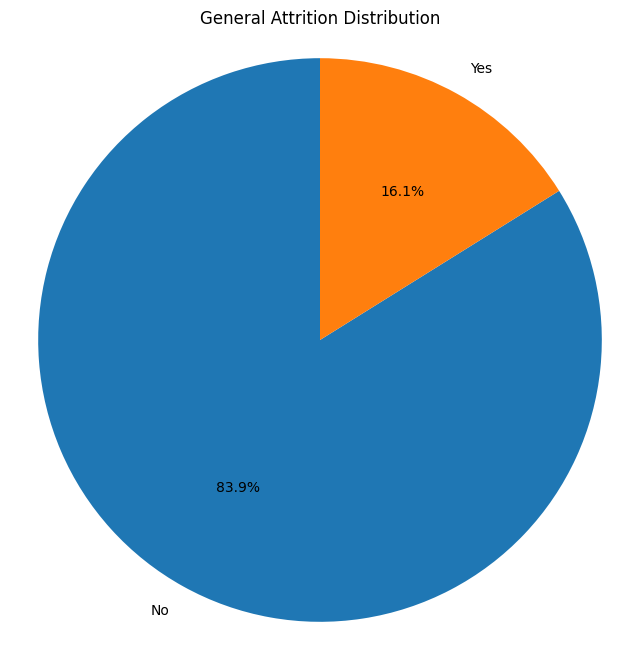

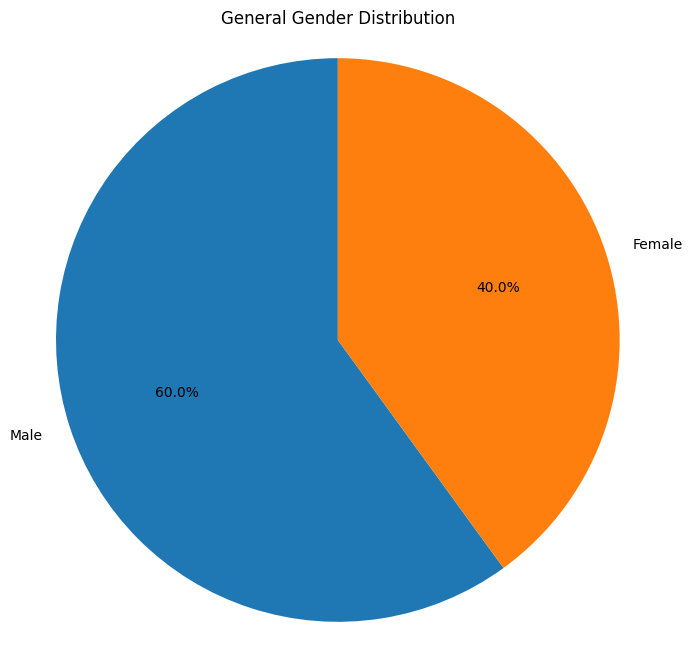

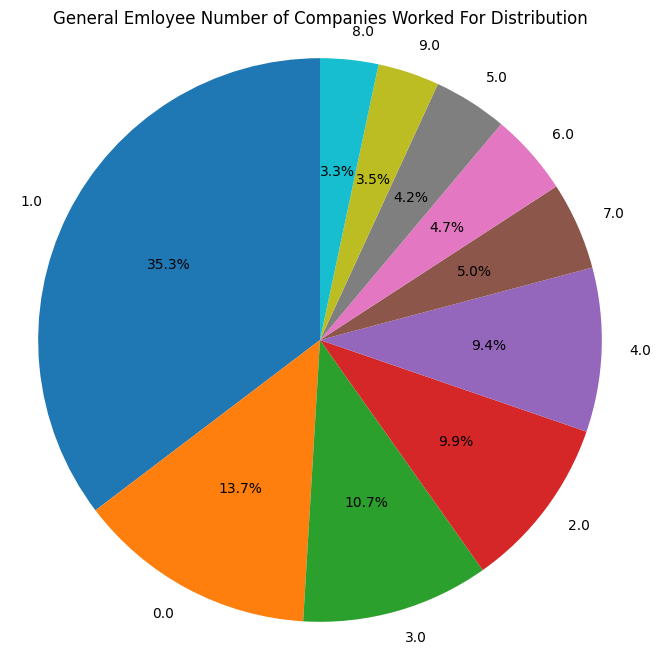

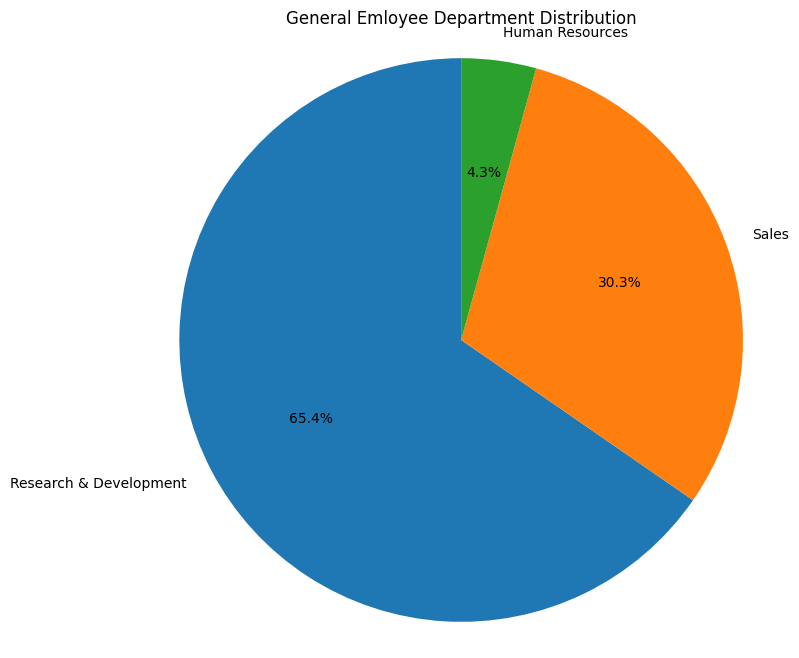

In [17]:
plot_pie_chart(general_df, "Attrition", title="General Attrition Distribution")
print("\n")
plot_pie_chart(general_df, "Gender", title="General Gender Distribution")
print("\n")
plot_pie_chart(general_df, "NumCompaniesWorked", title="General Emloyee Number of Companies Worked For Distribution")
print("\n")
plot_pie_chart(general_df, "Department", title="General Emloyee Department Distribution")

# **Interpreatations from the data visualizations above:**



1.   The company is male dominant. With 60% of the employees being male
2.   The company seems to employ mainly employees early in their career with a significant 35.5% of the employees have only worked at one other company before now, and 13.3% of the employees never worked before now



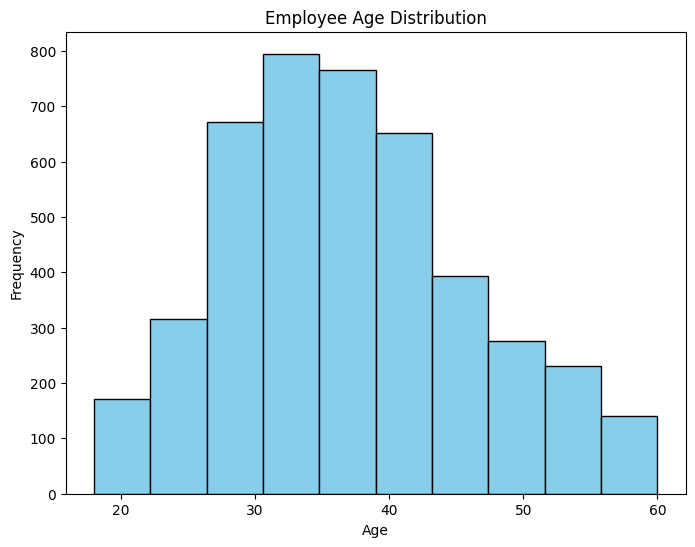

In [18]:
plot_histogram(general_df, "Age", title="Employee Age Distribution")

The histogram above shows that most employees are between the ages 30-35

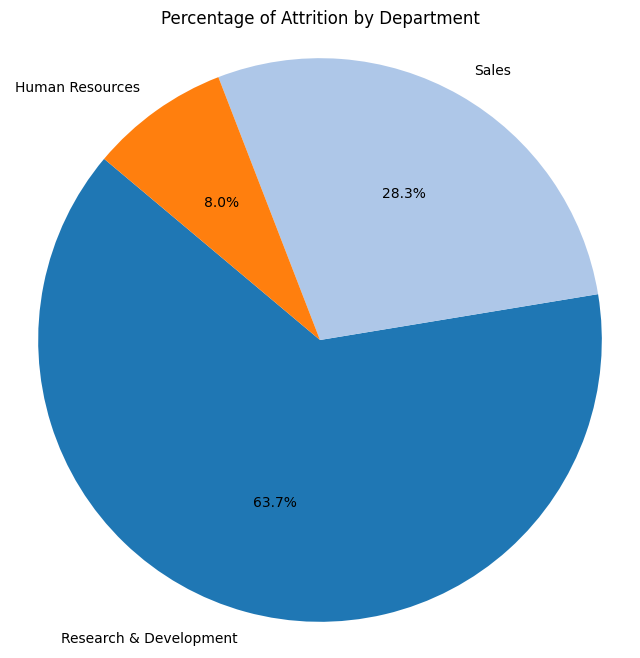

In [19]:
# Step 1: Filter and aggregate data
attrition_data = general_df[general_df['Attrition'] == 'Yes']
attrition_count = attrition_data['Department'].value_counts()

# Step 2: Calculate percentages
attrition_percentage = attrition_count / attrition_count.sum() * 100

# Step 3: Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_percentage, labels=attrition_percentage.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of Attrition by Department')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.show()

  I found it interesting that although HR contributes 4.3% of the general employee population it still contributed a significant 8% of the attrition population with repspect to its size

In [20]:
for col in general_df.columns:
  if general_df[col].dtype == 'O':
    print(f"Colum {col} in the general data csv file has these unique values: {general_df[col].unique()}")

    if(len(general_df[col].unique()) <= 2): #with label encoding I dont want the model to think there is an ordinal relationship in any of the catregorical columns which is why is why i am restricting label encoding to only biinary categorical columns
      general_df[col] = le.fit_transform(general_df[col])
    else:
      general_df = pd.get_dummies(general_df, columns=[col])

Colum Attrition in the general data csv file has these unique values: ['No' 'Yes']
Colum BusinessTravel in the general data csv file has these unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Colum Department in the general data csv file has these unique values: ['Sales' 'Research & Development' 'Human Resources']
Colum EducationField in the general data csv file has these unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Colum Gender in the general data csv file has these unique values: ['Female' 'Male']
Colum JobRole in the general data csv file has these unique values: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Colum MaritalStatus in the general data csv file has these unique values: ['Married' 'Single' 'Divorced']
Colum Over18 in the general data csv file has these uniq

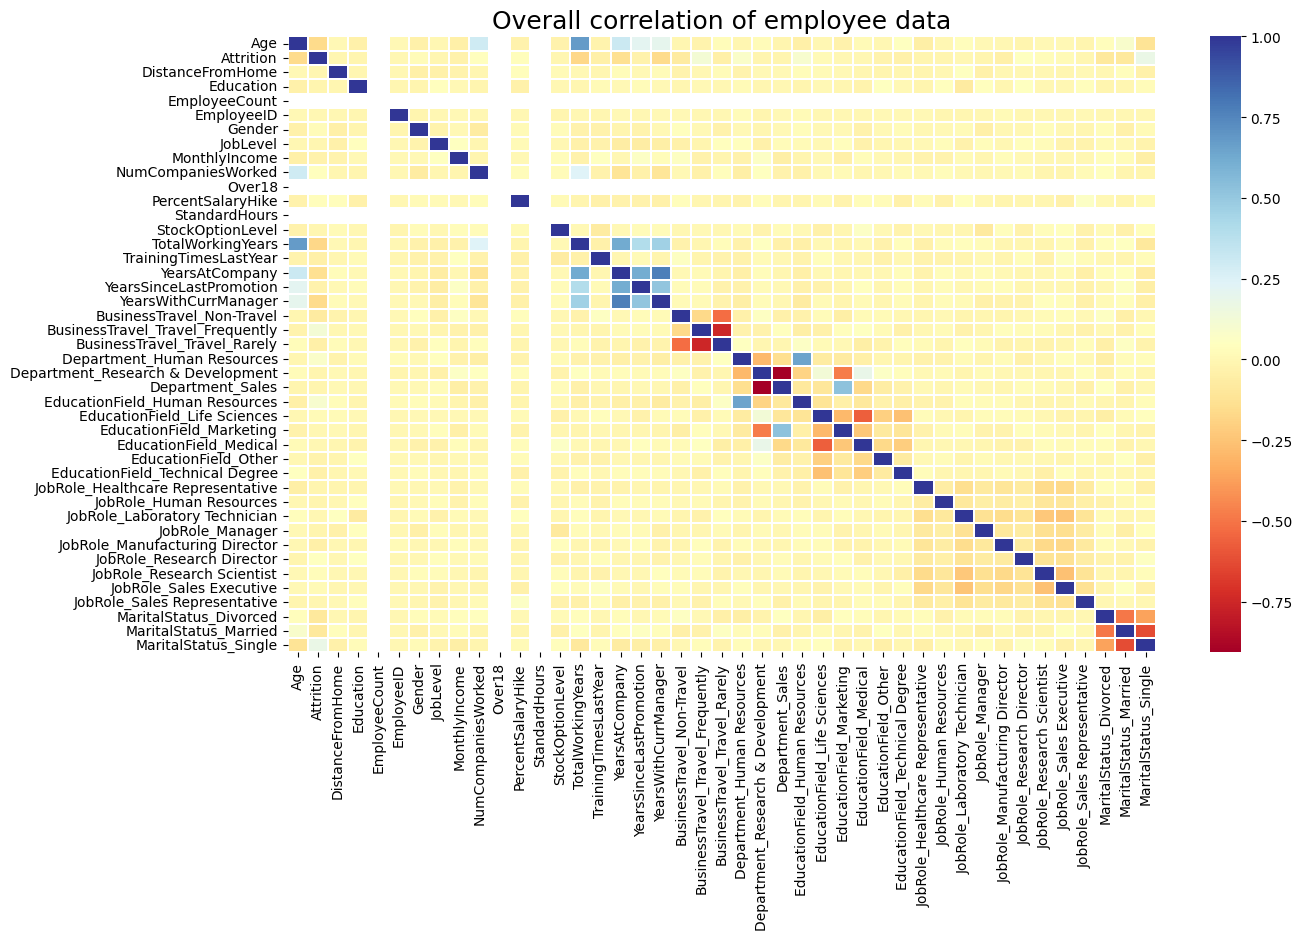

In [21]:
plot_correlation_heatmap(general_df, title="Overall correlation of employee data")

In [22]:
general_df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,9.192517,2.912925,1.0,2205.500000,0.600000,2.063946,65029.312925,2.683220,0.0,15.209524,8.0,0.793878,11.256916,2.799320,7.008163,2.187755,4.123129
std,9.133301,0.367780,8.105026,1.023933,0.0,1273.201673,0.489954,1.106689,47068.888559,2.499737,0.0,3.659108,0.0,0.851883,7.790928,1.288978,6.125135,3.221699,3.567327
min,18.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,10090.000000,0.000000,0.0,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.0,1103.250000,0.000000,1.000000,29110.000000,1.000000,0.0,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.0,2205.500000,1.000000,2.000000,49190.000000,2.000000,0.0,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.0,3307.750000,1.000000,3.000000,83800.000000,4.000000,0.0,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,4410.000000,1.000000,5.000000,199990.000000,9.000000,0.0,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [23]:
general_df['EmployeeCount'].dtype

dtype('int64')

In [24]:
general_df.corrwith(general_df['Attrition'])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
Age,-0.159205
Attrition,1.000000
DistanceFromHome,-0.009730
Education,-0.015111
EmployeeCount,NaN
EmployeeID,-0.004729
Gender,0.018125
JobLevel,-0.010290
MonthlyIncome,-0.031176
NumCompaniesWorked,0.041503


From the correlation, i notice that some columns have NANs, hence they are redundant for the model since they mostly like have the same value in every row. I also a lot of features have little or negative correlations, which could signify that no single individual feature has much influence over attrition but features combined. Could also just be due to the significant imbalance between the Attrition rows with No compared to those with Yes

In [25]:
nan_columns = ["EmployeeCount", "Over18", "StandardHours"]

general_df = general_df.drop(columns=nan_columns)

In [26]:
general_df_X = general_df.drop(columns=["Attrition"])
general_df_y = general_df['Attrition']

Employee Dataframe Visualization And Preprocessing

In [27]:
employee_survey_df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [28]:
employee_survey_df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [29]:
employee_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [30]:
for col in employee_survey_df.columns: #any columns that has NAN as a value would represent 0
  employee_survey_df[col].fillna(0,inplace=True)

In [31]:
employee_survey_df.isnull().sum()

,0
EmployeeID,0
EnvironmentSatisfaction,0
JobSatisfaction,0
WorkLifeBalance,0


In [32]:
employee_survey_df.shape

(4410, 4)

In [33]:
employee_survey_df = employee_survey_df.drop(columns=["EmployeeID"])

In [34]:
employee_survey_df.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000
mean,2.708163,2.715873,2.737642
std,1.108679,1.113943,0.748091
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,3.000000
max,4.000000,4.000000,4.000000


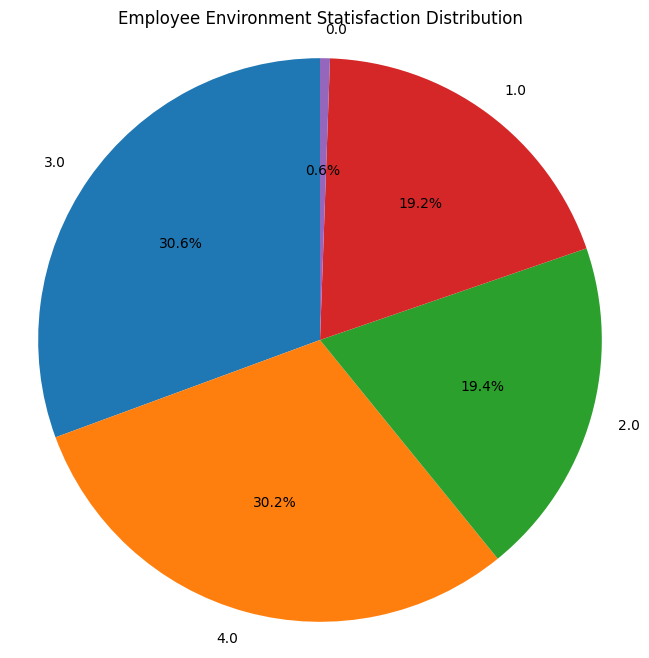

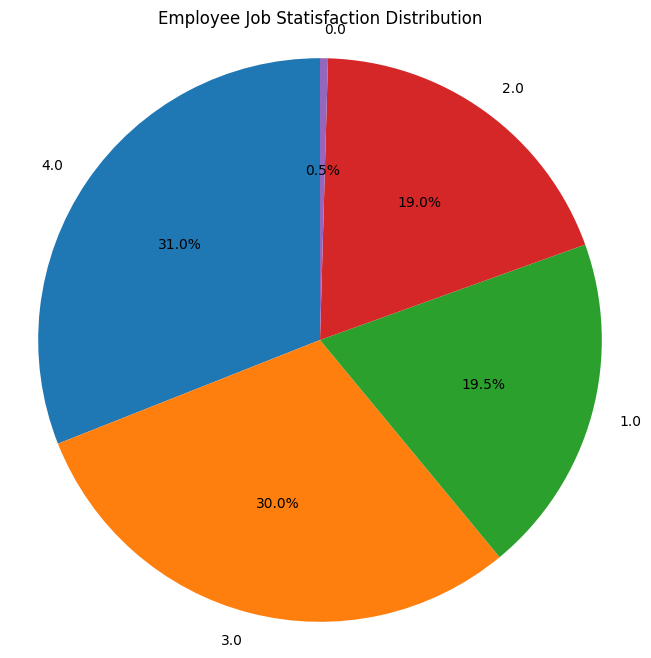

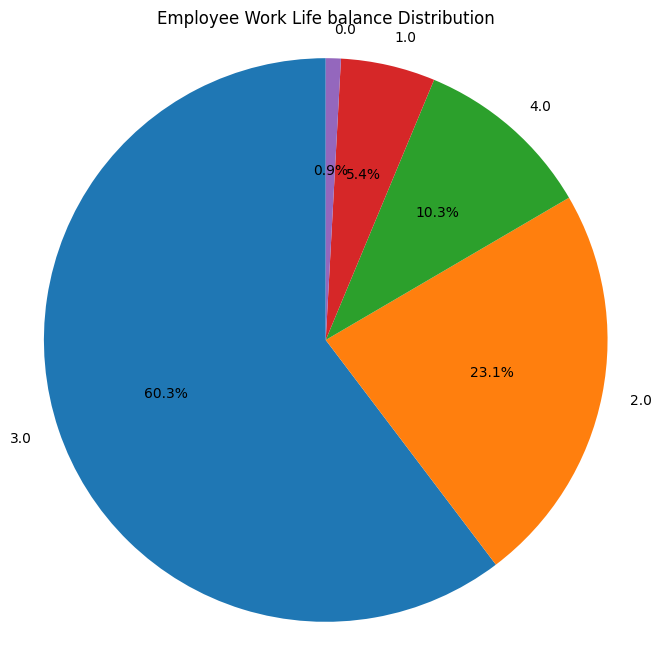

In [35]:
plot_pie_chart(employee_survey_df, "EnvironmentSatisfaction", title="Employee Environment Statisfaction Distribution")
plot_pie_chart(employee_survey_df, "JobSatisfaction", title="Employee Job Statisfaction Distribution")
plot_pie_chart(employee_survey_df, "WorkLifeBalance", title="Employee Work Life balance Distribution")

The statistical description and visualizations above shows that most employees barely like their job with most rating their work life balance, job and environment satisfaction a three.

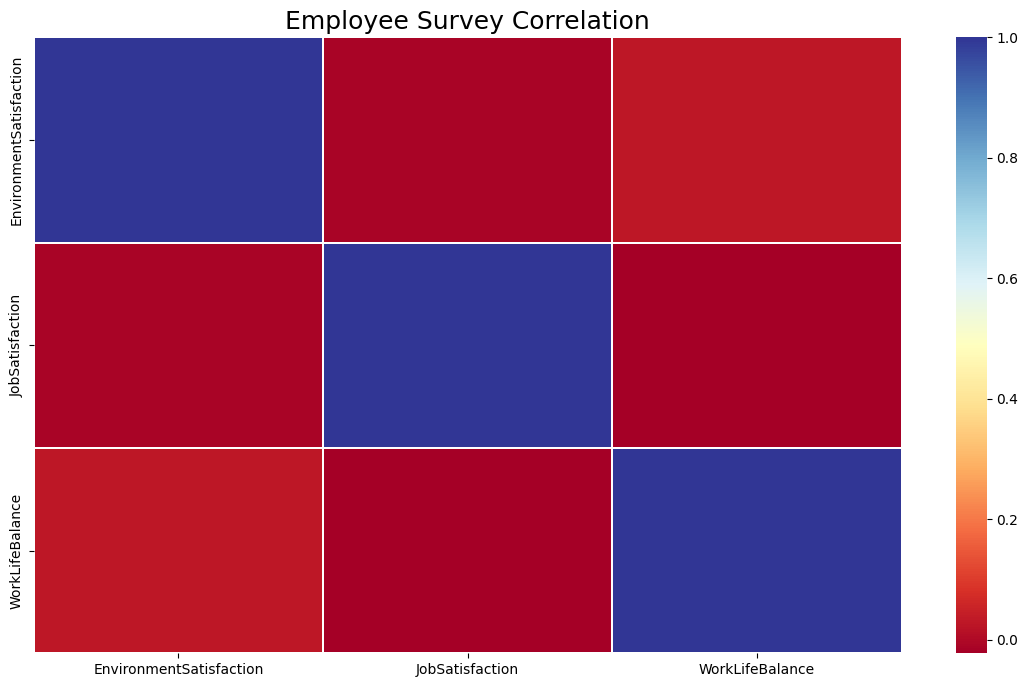

In [36]:
plot_correlation_heatmap(employee_survey_df, title="Employee Survey Correlation")

In [37]:
employee_survey_df.corr()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EnvironmentSatisfaction,1.000000,-0.011142,0.026073
JobSatisfaction,-0.011142,1.000000,-0.022518
WorkLifeBalance,0.026073,-0.022518,1.000000


Manager Survey Dataframe Analysis And Visualization

In [38]:
manager_survey_df.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [39]:
manager_survey_df.shape

(4410, 3)

In [40]:
if(manager_survey_df.isnull().values.any()):
  manager_survey_df.dropna()

In [41]:
manager_survey_df.shape

(4410, 3)

In [42]:
manager_survey_df.columns

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')

In [43]:
manager_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [44]:
manager_survey_df.drop(columns=["EmployeeID"], inplace=True)

In [45]:
manager_survey_df.describe()

,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000
mean,2.729932,3.153741
std,0.711400,0.360742
min,1.000000,3.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,3.000000
max,4.000000,4.000000


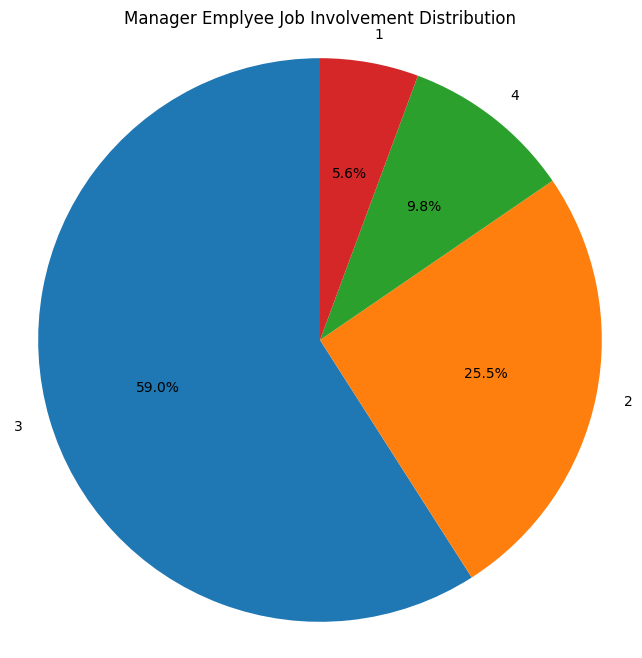

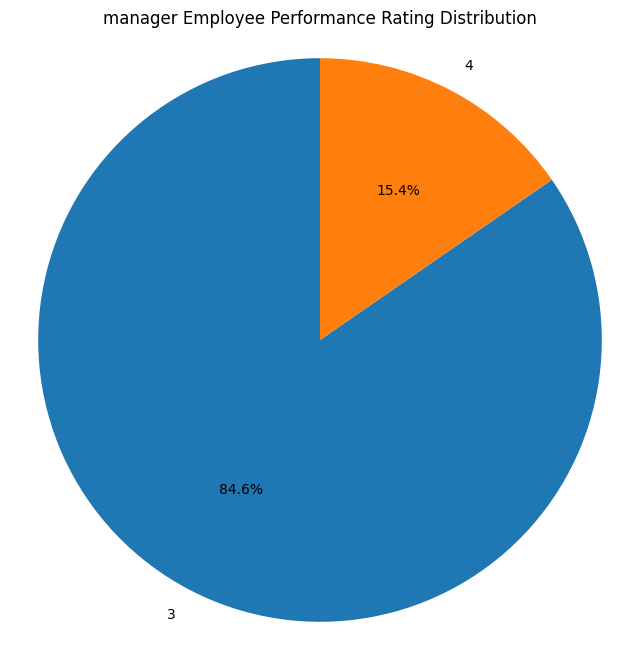

In [46]:
plot_pie_chart(manager_survey_df, "JobInvolvement", title="Manager Emplyee Job Involvement Distribution")
plot_pie_chart(manager_survey_df, "PerformanceRating", title="manager Employee Performance Rating Distribution")

The data shows that the mangager rate most of its employees performancen and job involvement. There might be a relationship between that and employees job end environment satisfaction. The company might need to investigate the manager-employee relationship in the office

Start Time Dataframe Visualization And Analysis

In [47]:
in_time_df

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [48]:
in_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [49]:
in_time_df.columns

Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)

In [50]:
in_time_df.drop(columns=["Unnamed: 0"], inplace = True) #drop redundant column

In [51]:
in_time_df.dropna(axis=1, how='all', inplace=True)#drop all columns that have nan in all their rows as it would signify that they are non-working days

In [52]:
in_time_df

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,...,NaN,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,2015-01-16 09:57:18,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,2015-01-16 10:05:36,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,2015-01-16 09:58:06,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,2015-01-16 10:03:50,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,2015-01-15 09:29:17,2015-01-16 09:49:37,...,2015-12-17 10:05:22,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,2015-01-15 10:18:11,2015-01-16 09:55:05,...,2015-12-17 09:45:49,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,2015-01-15 10:08:31,2015-01-16 10:18:40,...,2015-12-17 10:01:36,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,2015-01-15 09:04:17,2015-01-16 10:04:15,...,2015-12-17 09:51:40,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [53]:
in_time_df.describe()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
count,4201,4204,4182,4201,4167,4195,4171,4145,4174,4146,...,4203,4171,4194,4160,4188,4160,4176,4180,4145,4197
unique,2551,2498,2538,2553,2503,2541,2541,2507,2495,2506,...,2557,2527,2480,2499,2537,2481,2527,2494,2527,2551
top,2015-01-02 10:01:29,2015-01-05 09:53:12,2015-01-06 10:08:38,2015-01-07 09:45:33,2015-01-08 09:51:45,2015-01-09 09:53:11,2015-01-12 09:52:32,2015-01-13 10:06:10,2015-01-15 10:00:49,2015-01-16 09:53:17,...,2015-12-17 10:12:04,2015-12-18 10:04:49,2015-12-21 09:58:25,2015-12-22 09:50:01,2015-12-23 09:52:19,2015-12-24 10:01:28,2015-12-28 09:57:03,2015-12-29 10:01:23,2015-12-30 09:56:54,2015-12-31 09:58:54
freq,8,8,8,6,7,8,8,8,8,8,...,8,8,7,8,8,7,7,6,8,8


End Time Visualization And Analysis

In [54]:
out_time_df.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [55]:
out_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [56]:
out_time_df.shape

(4410, 262)

In [57]:
out_time_df.columns

Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)

In [58]:
out_time_df.drop(columns=["Unnamed: 0"], inplace=True)

In [59]:
out_time_df.dropna(axis=1, how="all", inplace=True)

In [60]:
out_time_df.shape

(4410, 249)

In [61]:
out_time_df.shape[0] == in_time_df.shape[0] #making sure they have the same number of emplyees registered

True

In [62]:
out_time_df.values

array([['2015-01-02 16:56:15', '2015-01-05 17:20:11',
        '2015-01-06 17:19:05', ..., '2015-12-29 17:22:30',
        '2015-12-30 17:40:56', '2015-12-31 17:17:33'],
       ['2015-01-02 18:22:17', '2015-01-05 17:48:22', nan, ...,
        '2015-12-29 17:54:46', '2015-12-30 18:31:35',
        '2015-12-31 17:40:58'],
       ['2015-01-02 16:59:14', '2015-01-05 17:06:46',
        '2015-01-06 16:38:32', ..., '2015-12-29 17:09:56',
        '2015-12-30 17:06:25', '2015-12-31 17:15:50'],
       ...,
       ['2015-01-02 17:17:35', '2015-01-05 17:08:07',
        '2015-01-06 17:27:46', ..., nan, '2015-12-30 17:48:14',
        '2015-12-31 18:08:55'],
       ['2015-01-02 19:48:37', '2015-01-05 19:37:40',
        '2015-01-06 20:00:08', ..., '2015-12-29 18:55:26',
        '2015-12-30 19:37:22', '2015-12-31 19:33:45'],
       ['2015-01-02 16:49:19', '2015-01-05 17:33:02',
        '2015-01-06 16:36:10', ..., '2015-12-29 17:16:19',
        '2015-12-30 17:29:55', '2015-12-31 16:39:18']], dtype=object)

In [63]:
for col in out_time_df.columns: #ensuring that both dataframes contain the same dates
  if(col not in in_time_df.columns):
    print(f"Out time and In time don't have the same date ${col}")
    break

Converting the original date values to hours and find how long employees worked for

In [64]:
for col in in_time_df.columns:
  in_time_df[col] = pd.to_datetime(in_time_df[col])
  out_time_df[col] = pd.to_datetime(out_time_df[col])

In [65]:
employee_work_hours_df = pd.DataFrame(index=in_time_df.index)

In [66]:
for col in in_time_df.columns:
  employee_work_hours_df[col] = round((out_time_df[col] - in_time_df[col]).dt.total_seconds() / 3600, 2)

<ipython-input-66-c8d452df29d8>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  employee_work_hours_df[col] = round((out_time_df[col] - in_time_df[col]).dt.total_seconds() / 3600, 2)
<ipython-input-66-c8d452df29d8>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  employee_work_hours_df[col] = round((out_time_df[col] - in_time_df[col]).dt.total_seconds() / 3600, 2)
<ipython-input-66-c8d452df29d8>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [67]:
employee_work_hours_df.fillna(0,inplace=True)

In [68]:
employee_work_hours_df

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,7.21,7.19,7.41,7.01,7.29,7.48,7.26,7.83,7.35,7.27,...,0.00,0.00,7.34,7.40,6.50,7.60,7.77,7.32,7.78,7.08
1,8.11,7.45,0.00,7.40,7.42,7.15,7.61,7.28,7.61,7.73,...,7.93,7.90,7.75,7.71,7.44,0.00,7.61,7.98,7.99,8.23
2,6.69,7.27,6.41,6.76,7.34,6.86,7.42,7.00,7.44,7.21,...,7.22,6.79,7.16,6.80,6.73,6.85,7.02,7.44,7.54,6.79
3,7.34,7.29,6.94,6.92,6.85,7.19,7.00,7.31,6.88,6.91,...,7.46,7.63,6.85,7.33,7.41,7.08,7.45,7.42,7.37,7.13
4,8.06,7.99,7.68,7.81,7.66,7.72,8.36,8.26,8.26,8.40,...,8.32,7.90,7.66,7.96,7.79,8.25,7.66,8.27,7.95,8.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,8.12,8.84,8.40,8.85,8.22,8.28,8.36,8.76,8.36,9.01,...,8.50,8.08,8.16,8.29,8.60,8.60,8.48,9.07,8.94,8.51
4406,6.26,0.00,5.39,5.73,6.19,5.71,6.05,6.29,6.01,5.59,...,5.98,5.92,5.83,5.92,6.11,5.99,5.67,6.56,5.70,6.15
4407,7.28,7.59,7.64,7.99,7.30,7.03,7.78,7.48,8.12,7.70,...,7.69,7.79,7.87,7.75,7.75,7.40,7.73,0.00,7.76,8.09
4408,9.53,9.59,9.79,9.39,9.20,0.00,9.29,9.60,9.48,9.34,...,9.26,9.97,9.34,9.37,9.24,9.70,10.05,9.01,9.36,9.62


In [69]:
employee_work_hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 249 entries, 2015-01-02 to 2015-12-31
dtypes: float64(249)
memory usage: 8.4 MB


In [70]:
employee_work_hours_df.describe()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,7.335329,7.344374,7.309093,7.342542,7.285279,7.331374,7.284154,7.257859,7.287043,7.251041,...,7.347338,7.290846,7.326361,7.277703,7.312707,7.277939,7.301184,7.307712,7.247302,7.335757
std,2.116429,2.107116,2.170585,2.116613,2.213507,2.136333,2.196834,2.268001,2.186113,2.264328,...,2.108508,2.201998,2.137394,2.234455,2.157250,2.231947,2.188578,2.174494,2.272239,2.130140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.530000,6.540000,6.540000,6.560000,6.530000,6.530000,6.530000,6.520000,6.540000,6.520000,...,6.540000,6.540000,6.550000,6.530000,6.520000,6.530000,6.532500,6.530000,6.510000,6.540000
50%,7.330000,7.325000,7.340000,7.360000,7.340000,7.360000,7.330000,7.340000,7.330000,7.340000,...,7.350000,7.330000,7.330000,7.325000,7.320000,7.330000,7.340000,7.350000,7.340000,7.350000
75%,8.290000,8.320000,8.310000,8.287500,8.280000,8.300000,8.297500,8.290000,8.260000,8.307500,...,8.327500,8.320000,8.320000,8.320000,8.310000,8.290000,8.277500,8.290000,8.300000,8.300000
max,11.530000,11.610000,11.570000,11.540000,11.960000,11.570000,11.670000,11.540000,11.720000,11.530000,...,11.690000,11.570000,11.530000,11.620000,11.580000,11.970000,12.090000,11.610000,11.500000,11.640000


In [71]:
employee_work_hours_df["Average work hours per day"] = employee_work_hours_df.mean(axis=1)

<ipython-input-71-46a93b28f23b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  employee_work_hours_df["Average work hours per day"] = employee_work_hours_df.mean(axis=1)


In [72]:
employee_work_hours_df["Average work hours per day"].describe()

,Average work hours per day
count,4410.000000
mean,7.314361
std,1.330775
min,5.416867
25%,6.279378
50%,7.011225
75%,7.900783
max,10.937430


The data above shows that employees work an average of 7.3 hours a day

# **Model preparation**

In [73]:
general_train_X, general_test_X, general_train_y, general_test_y = train_test_split(general_df_X, general_df_y, test_size=0.2, random_state=42)

In [74]:
model = LogisticRegression(max_iter=10000)

In [75]:
model.fit(general_train_X, general_train_y)

LogisticRegression(max_iter=10000)

In [77]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(general_test_X)[:, 1]  # Probabilities for the positive class (class 1)


In [79]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(general_test_y, y_pred_prob)

In [80]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score
roc_auc = roc_auc_score(general_test_y, y_pred_prob)
print(f'AUC Score: {roc_auc:.2f}')


AUC Score: 0.70


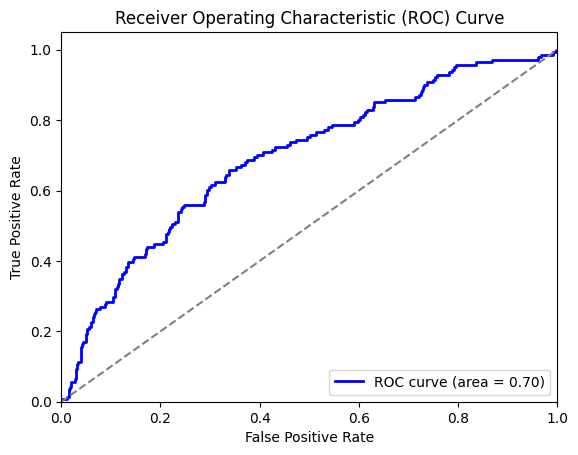

In [81]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [82]:
# Find the index of the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Use the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# Calculate adjusted accuracy and other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(general_test_y, y_pred_optimal)
precision = precision_score(general_test_y, y_pred_optimal)
recall = recall_score(general_test_y, y_pred_optimal)
f1 = f1_score(general_test_y, y_pred_optimal)

print(f'Adjusted Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Adjusted Accuracy: 0.66
Precision: 0.27
Recall: 0.66
F1 Score: 0.38


In [83]:
print(optimal_threshold)

0.1787860622893091
